In [3]:
## import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
## import libraries for modelling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score, auc, log_loss

from mlxtend.plotting import plot_confusion_matrix

In [5]:
## import libraries
import tensorflow as tf

In [6]:
## import libraries
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
import itertools

In [7]:
## import libraries
from PIL import Image
import imageio.v3 as iio
import glob
from matplotlib.pyplot import imread
import cv2

## This file works on Histopathology Dataset for CNN modelling

In [8]:
## load the image dataset
image_histopat_path_v4= glob.glob('/Users/lalebaksi/Desktop/DS_3rd_Phase/Breast Histopathology Images/IDC_regular_ps50_idx5/**/*.png', recursive=True)

In [9]:
## check that I have the images in here
for imgname in image_histopat_path_v4[:8]:
    print(imgname)

/Users/lalebaksi/Desktop/DS_3rd_Phase/Breast Histopathology Images/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1051_y2401_class0.png
/Users/lalebaksi/Desktop/DS_3rd_Phase/Breast Histopathology Images/IDC_regular_ps50_idx5/9036/0/9036_idx5_x2951_y951_class0.png
/Users/lalebaksi/Desktop/DS_3rd_Phase/Breast Histopathology Images/IDC_regular_ps50_idx5/9036/0/9036_idx5_x3001_y1451_class0.png
/Users/lalebaksi/Desktop/DS_3rd_Phase/Breast Histopathology Images/IDC_regular_ps50_idx5/9036/0/9036_idx5_x3051_y801_class0.png
/Users/lalebaksi/Desktop/DS_3rd_Phase/Breast Histopathology Images/IDC_regular_ps50_idx5/9036/0/9036_idx5_x951_y1901_class0.png
/Users/lalebaksi/Desktop/DS_3rd_Phase/Breast Histopathology Images/IDC_regular_ps50_idx5/9036/0/9036_idx5_x2251_y751_class0.png
/Users/lalebaksi/Desktop/DS_3rd_Phase/Breast Histopathology Images/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1901_y401_class0.png
/Users/lalebaksi/Desktop/DS_3rd_Phase/Breast Histopathology Images/IDC_regular_ps50_idx5/9036/0/9036_i

In [8]:
## create two lists to save the images into it accordingly
## non-cancer and cancer lists
## set elif condition for image labels
## label 0 = non-cancer images
## label 1 =  cancer images

non_cancer_img=[]
cancer_img=[]

for img in image_histopat_path_v4:
    if img[-5]== '0':
        non_cancer_img.append(img)
    elif img[-5]== '1':
        cancer_img.append(img)

In [9]:
## check that I have the correct number of images for correct cancer and non-cancer lists

non_cancer_num= len(non_cancer_img)
cancer_num= len(cancer_img)

total_img_num= non_cancer_num + cancer_num
print('No of Images of no Cancer: {}'.format(non_cancer_num))
print('No of Images of Cancer: {}'.format(cancer_num))
print('Total No of Images: {}'.format(total_img_num))

No of Images of no Cancer: 198738
No of Images of Cancer: 78786
Total No of Images: 277524


In [11]:
## make table for plot

data= pd.DataFrame({'state of cancer': ['0', '1'], 'No of Patients': [198738, 78786]})

In [13]:
## plot the number of patients with cancer and without cancer

hist_data_bar = px.bar(data_frame=data, x = 'state of cancer', y='No of Patients', color='state of cancer')
hist_data_bar.update_layout(title_text='No of Patients with cancer(1) and No of Patients without cancer(0)', title_x=0.5)
hist_data_bar.show()

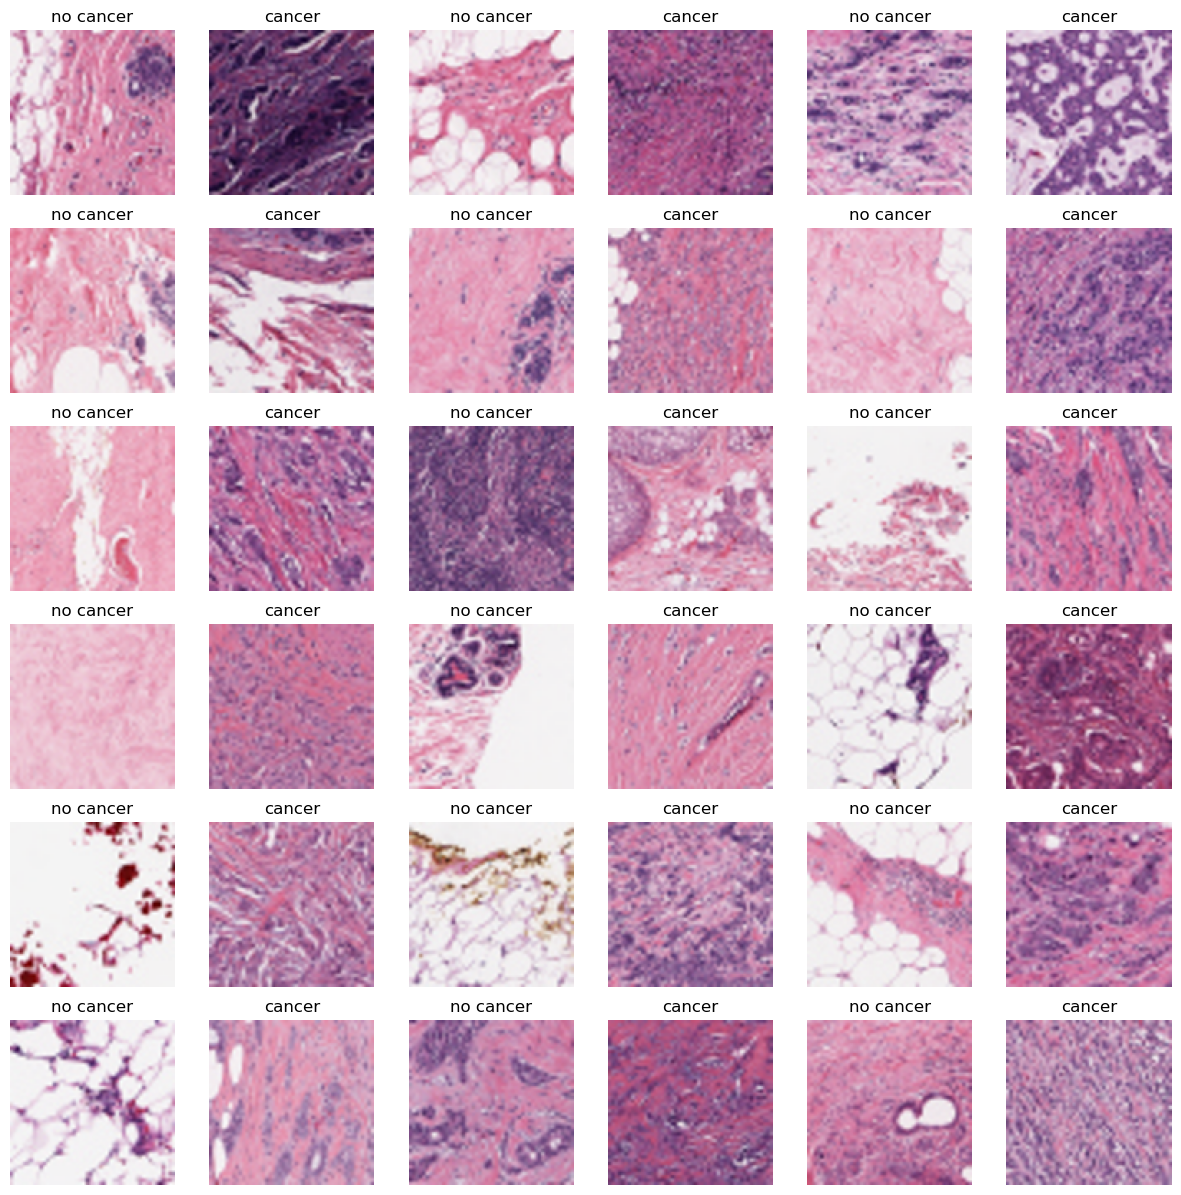

In [10]:
## plot cancer and non-cancer images 
## convert the images a numpy array by uint8  (unsigned 8-bit integer)
## choose the images randomly, choose 18 from each list
## resize the images by 100x100 pixels
## use a 6x6 grid
## convert the color

plt.figure(figsize = (15, 15))

some_non_cancer = np.random.randint(0, len(non_cancer_img), 18)
some_cancer = np.random.randint(0, len(cancer_img), 18)

s = 0
for num in some_non_cancer:
        image_path= non_cancer_img[num]
        image = Image.open(image_path).convert('RGB')
        image= image.resize((100,100))
        image_array = np.array(image)
        image_array = image_array.astype('uint8')
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(image_array)
        s += 1
        
s = 1
for num in some_cancer:
        image_path= cancer_img[num]
        image = Image.open(image_path).convert('RGB')
        image = image.resize((100,100))
        image_array = np.array(image)
        image_array = image_array.astype('uint8')

        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('cancer')
        plt.imshow(image_array)
        s += 1


In [11]:
## to shorten the modelling process, reduce the no of non_cancer images
## so that we have equal number of images for both cancer and non-cancer images

new_non_cancer_img=non_cancer_img[:78786]

print(len(new_non_cancer_img))
print(len(cancer_img))

78786
78786


In [12]:
## import image augmentation library

import imgaug.augmenters as iaa

In [13]:
## random sample images
## create two lists again
## data augmentation to improve the modelling
## use cv2 library - imread, resize for both 
## use imgaug - rotation, zoom and flip

rotation_aug= iaa.Affine(rotate=(-10, 10))
zoom_aug= iaa.Affine(scale=(0.8, 1.2))
flip_aug= iaa.Fliplr(0.5)

some_non_cancer_img= random.sample(new_non_cancer_img, len(new_non_cancer_img))
some_cancer_img= random.sample(cancer_img, len(cancer_img))

non_cancer_img_arr= []
cancer_img_arr= []

for img in some_non_cancer_img:
    n_img= cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size= cv2.resize(n_img, (50, 50), interpolation= cv2.INTER_LINEAR)
    n_img_size= rotation_aug.augment_image(n_img_size)
    n_img_size= zoom_aug.augment_image(n_img_size)
    n_img_size= flip_aug.augment_image(n_img_size)
    non_cancer_img_arr.append([n_img_size, 0])

for img in some_cancer_img:
    c_img= cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size= cv2.resize(c_img, (50, 50), interpolation= cv2.INTER_LINEAR)
    c_img_size= rotation_aug.augment_image(c_img_size)
    c_img_size= zoom_aug.augment_image(c_img_size)
    c_img_size= flip_aug.augment_image(c_img_size)
    cancer_img_arr.append([c_img_size, 1])

In [14]:
## chefk that I have correct no of images after improving the images

print(len(non_cancer_img_arr))
print(len(cancer_img_arr))
print(len(non_cancer_img_arr)+len(cancer_img_arr))

78786
78786
157572


In [32]:
## combine the two lists together to create one list of images for the model
## random.shuffle - make sure the order of feature-label pairs are randomized
## in order to bring the model processing time shorter, choose a sample size of 50,000 images from each side 

X= []
Y= []
histo_img_arr_v3= np.concatenate((non_cancer_img_arr[:50000], cancer_img_arr[:50000]))
random.shuffle(histo_img_arr_v3)

for feature, label in histo_img_arr_v3:
    X.append(feature)
    Y.append(label)

X= np.array(X)
Y= np.array(Y)

print('X shape: {}'.format(X.shape))

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


X shape: (100000, 50, 50, 3)


In [33]:
## split the test and check the test & train sizes
## use to_categorical for one-hot encoded format 

from keras.utils.np_utils import to_categorical

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.25, random_state=32)

#rate= 0.5
#num= int(X.shape[0]*rate)

Y_train= to_categorical(Y_train, 2)
Y_test= to_categorical(Y_test, 2)

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('Y_train shape: {}'.format(Y_train.shape))
print('Y_test shape: {}'.format(Y_test.shape))

X_train shape: (75000, 50, 50, 3)
X_test shape: (25000, 50, 50, 3)
Y_train shape: (75000, 2)
Y_test shape: (25000, 2)


In [34]:
## set the random seed at 100
## sequence of random numbers generated remains the same every time I run the code
import tensorflow as tf
tf.random.set_seed(100)

In [35]:
## set a threshold to prevent running unnecessarily

early_stopping= callbacks.EarlyStopping(
    min_delta=0.01,
    patience=10,
    restore_best_weights=True)

I have applied several different types to see the best model for this dataset.  B_project CNN model has the full set of images (277k images) with 96% accuracy but with a very poor result for Type2 error, and also it took 2 hours to run...

Here, I am trying the same CNN model in B_project but with a smaller image dataset this time (100,000 images)

I ran this model several times starting with 5,000 images and increased the dataset incrementally. 

For CNN model: I have used 11 layers in total, 4 Convolutional layers, 4 Max Pooling layers, 1 Flatten layer, 2 Dense layers.

The definitions for the model:

Padding 'same' = the number of zero columns are padded to the left and right of the input image

Kernel 3x3 = it will use fewer parameters and require fewer computations to perform better.

Activation = 'relu' will eliminate the linear components in the images such as reducing the shadows in the images

Activation = 'softmax' function at the last layer will ensure that our prediction will add to 1

MaxPooling = Spatial Invariance, meaning where the features are closer or a further apart, we will have the flexibility to find out the feature with pooling.  While we are preserving the features as we are taking the max no of pixels, we are still counting for any distortions; spatial, textured or any other kind.

MaxPooling = we are also reducing the no of parameters so we are preventing overfitting

Flatten = to reorder the Pooled Feature Map in a single column so that could be used as an input for further processing. we have to use this function before the first Dense layer since it expects 1D array of features for each instance

In [36]:

## prepare the CNN model

path_model_v3= tf.keras.Sequential()

path_model_v3.add(tf.keras.layers.Conv2D(32,(3, 3), padding='same', activation= 'relu', input_shape=(50, 50, 3))) 
path_model_v3.add(tf.keras.layers.MaxPooling2D(strides=2))

path_model_v3.add(tf.keras.layers.Conv2D(64,(3, 3), padding='same', activation= 'relu')) 
path_model_v3.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2))

path_model_v3.add(tf.keras.layers.Conv2D(128,(3, 3), padding='same', activation= 'relu')) 
path_model_v3.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2))

path_model_v3.add(tf.keras.layers.Conv2D(128,(3, 3), padding='same', activation= 'relu')) 
path_model_v3.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2))

path_model_v3.add(tf.keras.layers.Flatten())
path_model_v3.add(tf.keras.layers.Dense(128, activation='relu'))
path_model_v3.add(tf.keras.layers.Dense(2, activation='softmax'))

In [37]:
## compile the CNN
## optimizer = use Adam for how weight is updated
## loss = use binary cross entropy as this is a binary classification

path_model_v3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics= ['accuracy'])

In [38]:
## check the summary

path_model_v3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 128)       

In [39]:
## train the  model
## use a higher batch size this time instead of 32
## set the callback for early stopping to prevent unnecessary run time

history_v3 = path_model_v3.fit(X_train, Y_train, batch_size=75, epochs=25, callbacks=early_stopping, validation_split=0.20)

Epoch 1/25
800/800 [==============================] - 62s 77ms/step - loss: 0.4340 - accuracy: 0.8676 - val_loss: 0.2869 - val_accuracy: 0.8770
Epoch 2/25
800/800 [==============================] - 66s 82ms/step - loss: 0.2887 - accuracy: 0.8824 - val_loss: 0.2862 - val_accuracy: 0.8843
Epoch 3/25
800/800 [==============================] - 67s 83ms/step - loss: 0.2763 - accuracy: 0.8864 - val_loss: 0.2753 - val_accuracy: 0.8917
Epoch 4/25
800/800 [==============================] - 67s 84ms/step - loss: 0.2664 - accuracy: 0.8907 - val_loss: 0.2611 - val_accuracy: 0.8941
Epoch 5/25
800/800 [==============================] - 67s 84ms/step - loss: 0.2574 - accuracy: 0.8951 - val_loss: 0.2480 - val_accuracy: 0.8970
Epoch 6/25
800/800 [==============================] - 68s 85ms/step - loss: 0.2497 - accuracy: 0.9001 - val_loss: 0.2493 - val_accuracy: 0.8978
Epoch 7/25
800/800 [==============================] - 68s 85ms/step - loss: 0.2407 - accuracy: 0.9033 - val_loss: 0.2518 - val_accuracy:

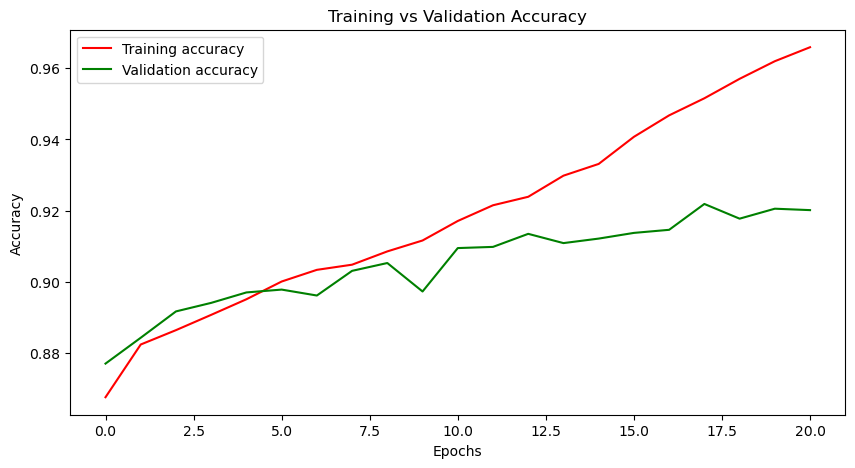

In [40]:
## check the training accuracy vs validation accuracy

history_v3_df= pd.DataFrame(history_v3.history)

plt.figure(figsize=(10,5))
plt.plot(history_v3_df.loc[:, ['accuracy']], color= 'red', label= 'Training accuracy')
plt.plot(history_v3_df.loc[:, ['val_accuracy']], color= 'green', label= 'Validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

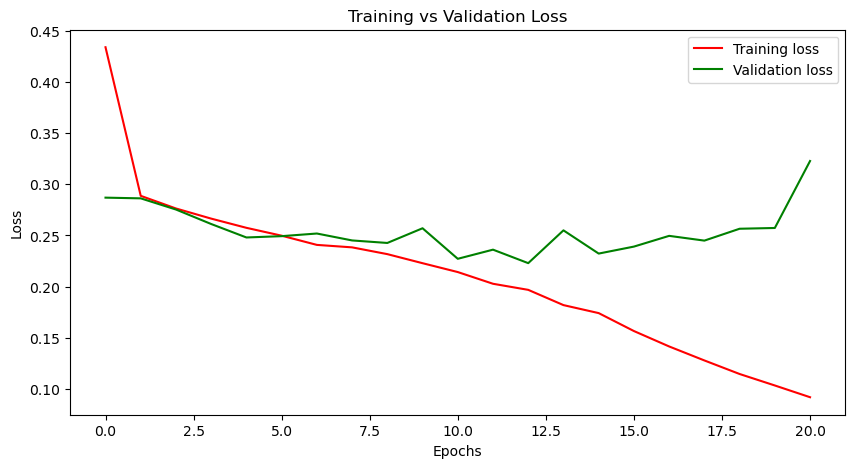

In [41]:
## check the training loss vs validation loss

plt.figure(figsize=(10,5))
plt.plot(history_v3_df.loc[:, ['loss']], color= 'red', label= 'Training loss')
plt.plot(history_v3_df.loc[:, ['val_loss']], color= 'green', label= 'Validation loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
## save the model
path_model_v3.save('Breast_cancer_pathology_model_v5')

INFO:tensorflow:Assets written to: Breast_cancer_pathology_model_v5/assets


INFO:tensorflow:Assets written to: Breast_cancer_pathology_model_v5/assets


In [43]:
## load the model 
BC_model_v5= tf.keras.models.load_model('Breast_cancer_pathology_model_v5')

In [44]:
## make a prediction
## use argmax to find the index of the highest value for prediction and test for Y
Y_pred=BC_model_v5.predict(X_test)
Y_pred_classes= np.argmax(Y_pred, axis= 1)
Y_true= np.argmax(Y_test, axis= 1)

782/782 [==============================] - 8s 11ms/step


In [45]:
## confusion matrix
BC_model_v5_CM= confusion_matrix(Y_true, Y_pred_classes)
BC_model_v5_CM

array([[20414,   744],
       [ 1412,  2430]])

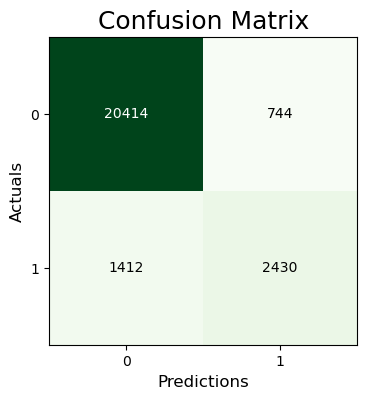

In [53]:
## plot the confusion matrix plot to see this clearly

fig, ax = plot_confusion_matrix(conf_mat=BC_model_v5_CM, figsize=(4,4), cmap='Greens')
plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

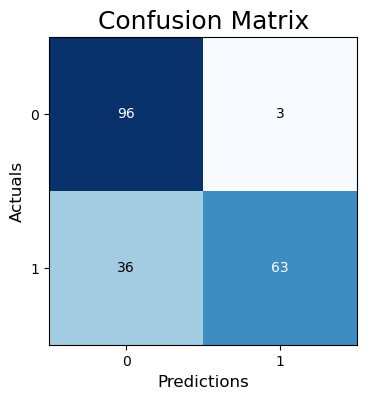

In [49]:
## plot the matrix as a percentage model

BC_model_v5_CM_perct= BC_model_v5_CM.astype('float')/BC_model_v5_CM.sum(axis=1)[:, np.newaxis]* 100

fig, ax = plot_confusion_matrix(conf_mat=BC_model_v5_CM_perct, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

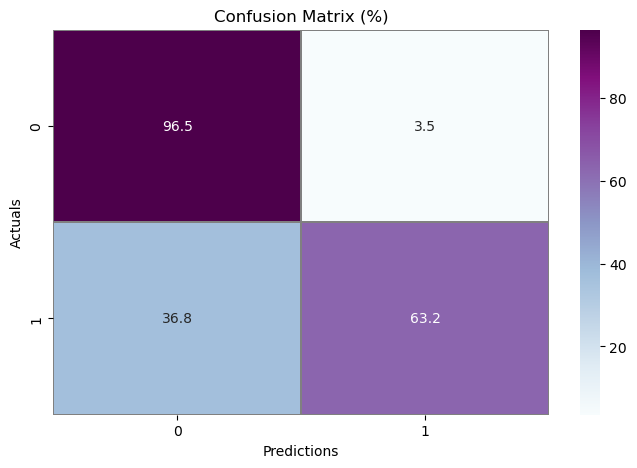

In [50]:
## another version of confusion matrix with percentage - seaborn works better 

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(BC_model_v5_CM_perct, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix (%)')
plt.show()

My true negative = looks very good for predicting 20,414 images correctly out of 21,158 images  = 96.5% correct prediction

My false positive - Type 1 error = is predicting falsely for only 744 images to have cancer, but in fact they are all healthy = 3.5% incorrect prediction

My true positive = looks correct for predicting 2430 images to have cancer correctly out of 3842 = 63.2% correct prediction

My false negative - Type 2 error = is predicting falsely for 1412 images who actually have cancer as healthy = 36.8% incorrect prediction

AUC: 0.798660


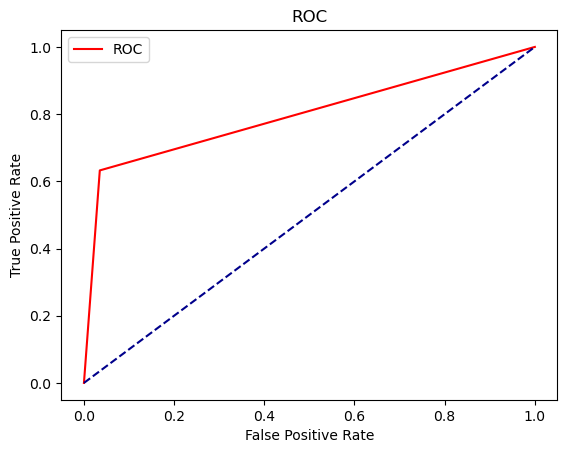

In [51]:
## plot the Area Under the Curver(AUC)

auc_mod_BC_v5= roc_auc_score(Y_true, Y_pred_classes)
print('AUC: %f' %auc_mod_BC_v5)

fpr, tpr = roc_curve(Y_true, Y_pred_classes)[0:2]
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [52]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     21158
           1       0.77      0.63      0.69      3842

    accuracy                           0.91     25000
   macro avg       0.85      0.80      0.82     25000
weighted avg       0.91      0.91      0.91     25000



CNN MODEL EVALUATION:

Even though the accuracy is at 91% with 0.798 AUC score, there is still room for improvement for my CNN model.

I have already altered the model and the parameters several times, so I may again try to move the data to AWS workspace and run it again with the complete image set of 277k.

As this is a health model, the False Negative has come down to less than 20%  (Public Health England tells us that 20% of breast cancers are missed by imaging technologies) My target for False Negative is 5%.

In [77]:
## use evaluate function to check the model for test values for X and Y
## similar to classification report

BC_model_v5.evaluate(X_test, Y_test)

782/782 [==============================] - 8s 10ms/step - loss: 0.2229 - accuracy: 0.9138


[0.2228556126356125, 0.9137600064277649]

In [78]:
## set 'Test Image' to check the saved CNN model

def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

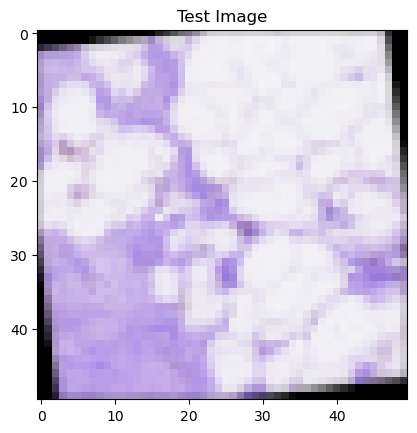

In [79]:
## show the test image
index = 9876
img_plot(X_test, index)

In [84]:
## check to verify that my model is working
## keep changing the index number to check the prediction vs true value
## di I manage to train my model to predict correctly?

def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

index = 9367

input = X_test[index:index+1]
cancer_pred = BC_model_v5.predict(input)[0].argmax()
cancer_label = Y_test[index].argmax()
print('Predicted Value using my model',cancer_pred)
print("True Value",cancer_label)


1/1 [==============================] - 0s 20ms/step
Predicted Value using my model 0
True Value 0


My CNN model is trained well so everytime I change the index number of the image, it predicts correctly.
